In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
from astropy.io import ascii
import numpy as np
from astropy.table import Table, Column, Row
import sys
import pandas as pd
from astropy.time import Time

In [125]:
results = json.load(open('bandbyband_h11_results.json', 'r'))

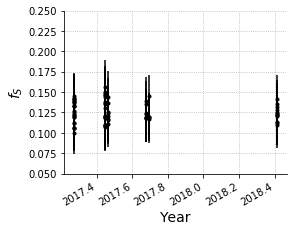

In [126]:
results_upper = dict()

fig, ax = plt.subplots(figsize=(4, 3))
for k, v in results.items():
    results_upper[k] = {ki: vi['f_S'] + vi['f_S_upper'] for ki, vi in v.items()}
    
    t = Time(k, format='isot')
    for ki, vi in v.items():
        ax.errorbar(t.decimalyear, vi['f_S'], np.array([[vi['f_S_lower'], vi['f_S_upper']]]), color='k', fmt='.')
        
for s in ['right', 'top']:
    ax.spines[s].set_visible(False)
    
ax.grid(ls=':')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('$f_S$', fontsize=14)
ax.set_ylim([0.05, 0.25])
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
fig.savefig('paper_plots/h11_timeseries.pdf', bbox_inches='tight')
plt.show()

In [120]:


df = pd.DataFrame(results_upper).transpose()

table = Table([Column(Time([str(i) for i in df.index], format='isot').jd, 'JD'), 
               Column(df['7054'], '7054'), 
               Column(df['7087'], '7087'), Column(df['7125'], '7125'), Column(df['8859'], '8859')])

In [121]:
rows = []
for i, row in enumerate(table): 
    new_row = [row['JD']]
    for name, col in zip(row.colnames, row): 
        if name != 'JD': 
            new_row.append("$<{0}$".format(round(col, 3)))
    rows.append(new_row)

formatted_table = Table(rows=rows, names=row.colnames)

In [122]:
formatted_table.write("h11_allbands.tex", format='latex')

In [123]:
!cat h11_allbands.tex

\begin{table}
\begin{tabular}{ccccc}
JD & 7054 & 7087 & 7125 & 8859 \\
2457854.90557 & $<0.139$ & $<0.147$ & $<0.162$ & $<0.169$ \\
2457854.92122 & $<0.142$ & $<0.149$ & $<0.162$ & $<0.166$ \\
2457854.93687 & $<0.134$ & $<0.152$ & $<0.173$ & $<0.165$ \\
2457854.95271 & $<0.138$ & $<0.151$ & $<0.166$ & $<0.173$ \\
2457854.96838 & $<0.129$ & $<0.156$ & $<0.171$ & $<0.176$ \\
2457854.98403 & $<0.133$ & $<0.152$ & $<0.159$ & $<0.172$ \\
2457916.81118 & $<0.136$ & $<0.149$ & $<0.176$ & $<0.18$ \\
2457916.83378 & $<0.135$ & $<0.149$ & $<0.168$ & $<0.178$ \\
2457916.89373 & $<0.135$ & $<0.146$ & $<0.165$ & $<0.177$ \\
2457916.91633 & $<0.135$ & $<0.151$ & $<0.17$ & $<0.187$ \\
2457916.93719 & $<0.139$ & $<0.147$ & $<0.171$ & $<0.179$ \\
2457924.80896 & $<0.139$ & $<0.15$ & $<0.166$ & $<0.149$ \\
2457924.826 & $<0.146$ & $<0.155$ & $<0.175$ & $<0.158$ \\
2458001.65522 & $<0.15$ & $<0.153$ & $<0.168$ & $<0.166$ \\
2458001.67781 & $<0.148$ & $<0.149$ & $<0.148$ & $<0.151$ \\
2458007.6439 & $<0.1

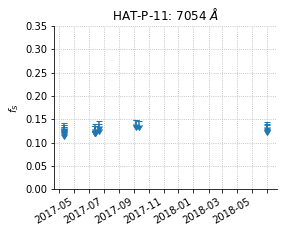

In [124]:
fig, ax = plt.subplots(figsize=(4, 3))

#ax.plot_date(Time(table['JD'], format='jd').plot_date, table['7125'], uplims=True)
ax.errorbar(Time(table['JD'], format='jd').plot_date, table['7054'], yerr=0.01, fmt='_', uplims=True)

import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y-%m')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)

plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

for s in ['right', 'top']:
    ax.spines[s].set_visible(False)
    
ax.set(ylabel='$f_S$', title='HAT-P-11: 7054 $\AA$', ylim=[0, 0.35])

ax.grid(ls=':')
# fig.savefig('paper_plots/h11_upper_lims.pdf', bbox_inches='tight')